<a href="https://colab.research.google.com/github/toheedakhtar/pytorch-deeplearning/blob/main/notebooks/01_pytorch_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
what_we_are_covering = {
    1: "data (prepare and laod)",
    2: "build model",
    3: "fitting model to data (training)",
    4: "making predictions and evaluating a model",
    5: "saving and loading a model",
    6: "putting it all together"
}

In [4]:
what_we_are_covering

{1: 'data (prepare and laod)',
 2: 'build model',
 3: 'fitting model to data (training)',
 4: 'making predictions and evaluating a model',
 5: 'saving and loading a model',
 6: 'putting it all together'}

In [5]:
import torch
from torch import nn # nn contains all of pytorch building blocks for neural networks
import matplotlib.pyplot as plt

torch.__version__

'2.4.1+cu121'

## 1. Data (preparing and loading)

Data can be almost anything.

* excel spreadsheet
* images
* videos
* audio
* dna
* text

Machine learning is a game of two parts,  
1. Get data into a numerical representation  
2. Build a model to learn patterns in that numerical presentation.


In [6]:
# create known parameters
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02
X  = torch.arange(start, end, step).unsqueeze(dim=1)  # adds 1 dimension
y = weight * X + bias

X[:10], y[:10], len(X), len(y)

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 50,
 50)

In [7]:
# splitting data into train and test sets.
train_split = int(.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

How might we better visualize our data?  
This is where the data explorer's motto comes in!  
"Visulize, visualize, visualize!"

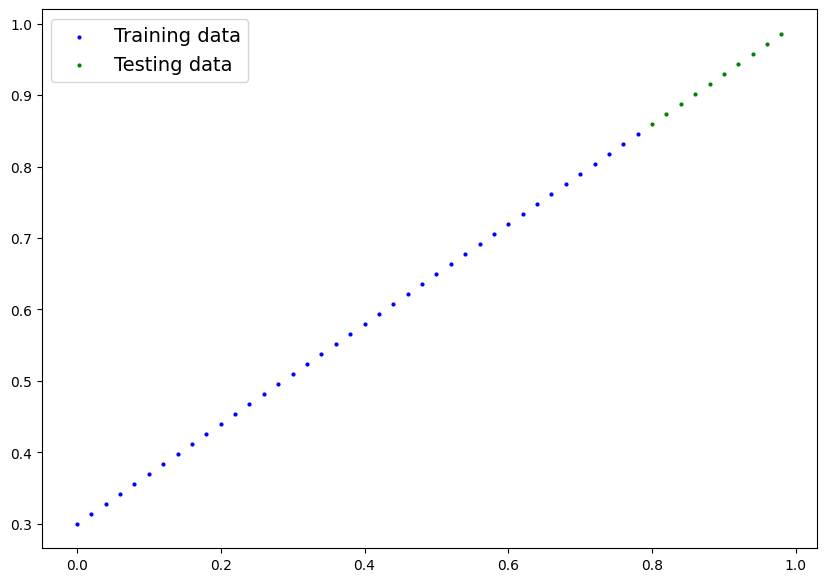

In [8]:
def plot_predictions(train_data=X_train, train_labels=y_train, test_data=X_test, test_labels=y_test, predictions=None):
  """
  Plots training data, test data, and compares predictions
  """
  plt.figure(figsize=(10,7))

  # train data in blue
  plt.scatter(train_data, train_labels, c='b', s=4, label="Training data")

  # test data in green
  plt.scatter(test_data, test_labels, c='g', s=4, label="Testing data")

  # are there predictions?
  if predictions is not None:
    # Plot the predictions if they exist
    plt.scatter(test_data, predictions, c='r', label='Predictions')

  # show the legend
  plt.legend(prop={"size":14})

plot_predictions()


## 2. Build Model

In [9]:
# linear regression
class LinearRegressionModel(nn.Module): # <- almost everything in pytorch inherits nn.Module
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))

   # forward method to define computation in model
  def forward(self, x: torch.Tensor) -> torch.Tensor: # x is input data
    return self.weights * x + self.bias


### Pytorch model building essesntials
* torch.nn - contains all of the building blocks for computational graphs / neural networks
* torch.nn.Parameter - what parameters should our model try and learn. often a PyTorch layer from torch.nn will set these for us
* torch.nn.Module - base class for all nerual network modules, if you subclass it , u should overwrite forward()
* torch.optim - this where the optimizer in PyTorch live, will help with Gradient Descent,
* forward() - different for every model

### checking contents of our pyTorch models.

In [10]:
torch.randn(1)

tensor([0.4177])

In [11]:
torch.manual_seed(42)

# create an instance of model
model_0 = LinearRegressionModel()
model_0

LinearRegressionModel()

In [12]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [13]:
# list named parameter
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

### Making predictions using `torch.inference_mode()`

In [14]:
# make predictions with model
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

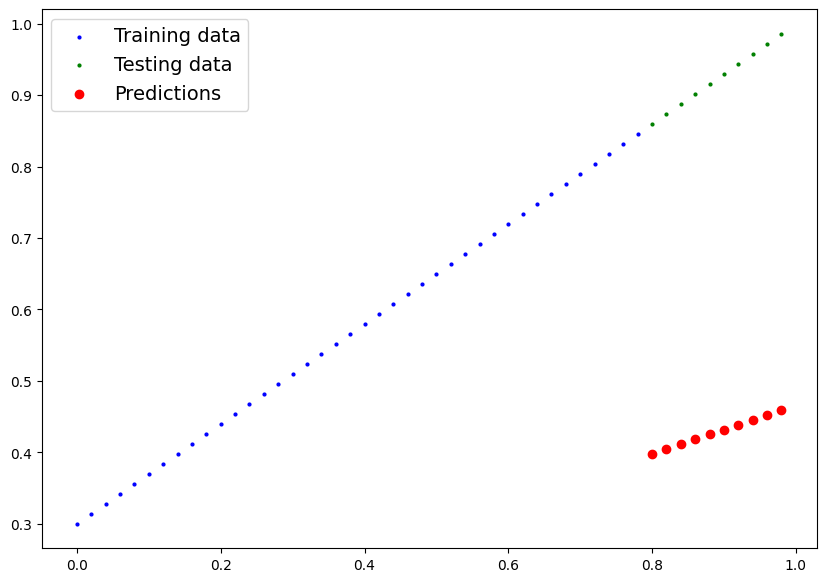

In [16]:
 plot_predictions(predictions=y_preds)

Things we need to train:  
* loss function : A function to measure how wrong your model's prediction are,
* Optimizer : Takes into account loss of a moel and adjusts the model's parameters

Specifically for PyTorch we need,  
* a training loop
* a testing loop

In [20]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [25]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [23]:
# setup a loss function
loss_fn = nn.L1Loss()

# setup an optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.01)

In [18]:
loss_fn

L1Loss()

### Building a training loop

0. Loop through the data
1. Forward pass
2. Calculate loos
3. Optimizer zero grad
4. Loss backward ( **backprop** )
5. Optimizer step ( **gradient descent**)

In [62]:
# an epoch is one loop
epochs = 50

# 0. loop thorugh the data
for epoch in range(epochs):
  model_0.train()  # calc grads of all parameters that require grads

  # 1. Forward Pass
  y_pred = model_0(X_train)

  # 2. calc the loss
  loss = loss_fn(y_pred, y_train)
  print(f"loss : {loss}")

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Backpropogation
  loss.backward()

  # 5. Step the optimizer (perform Gradient descent)
  optimizer.step()

  # Testing
  model_0.eval()  # turns off different settings in the model not needed for evaluation / testing

  print(model_0.state_dict())


loss : 0.015525798313319683
OrderedDict([('weights', tensor([0.6245])), ('bias', tensor([0.3318]))])
loss : 0.015182236209511757
OrderedDict([('weights', tensor([0.6261])), ('bias', tensor([0.3308]))])
loss : 0.014840595424175262
OrderedDict([('weights', tensor([0.6279])), ('bias', tensor([0.3303]))])
loss : 0.01449323259294033
OrderedDict([('weights', tensor([0.6295])), ('bias', tensor([0.3293]))])
loss : 0.014155393466353416
OrderedDict([('weights', tensor([0.6313])), ('bias', tensor([0.3288]))])
loss : 0.013806397095322609
OrderedDict([('weights', tensor([0.6331])), ('bias', tensor([0.3283]))])
loss : 0.013468016870319843
OrderedDict([('weights', tensor([0.6347])), ('bias', tensor([0.3273]))])
loss : 0.013121193274855614
OrderedDict([('weights', tensor([0.6365])), ('bias', tensor([0.3268]))])
loss : 0.01277900766581297
OrderedDict([('weights', tensor([0.6381])), ('bias', tensor([0.3258]))])
loss : 0.012435992248356342
OrderedDict([('weights', tensor([0.6399])), ('bias', tensor([0.32

In [63]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)

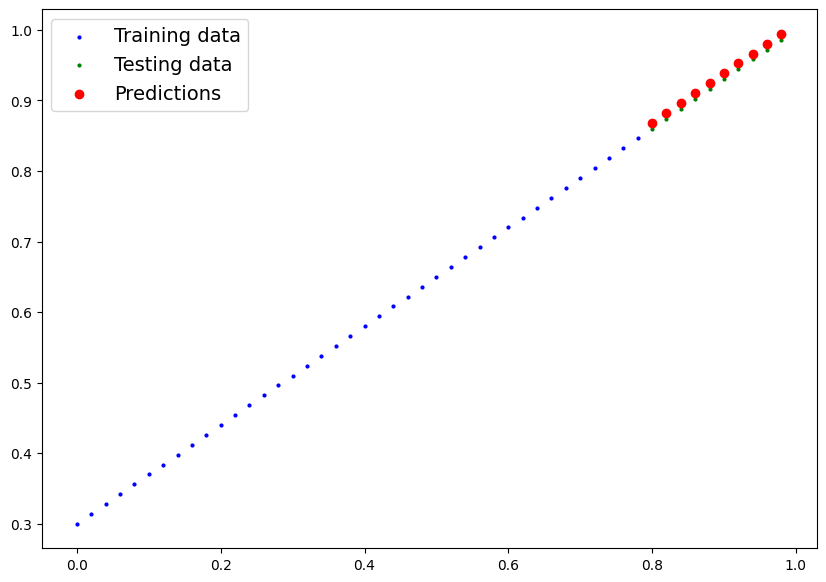

In [64]:
plot_predictions(predictions=y_preds_new)